In [3]:
# %load nbinit.py
# Initialize stuff
import matplotlib
matplotlib.use('nbagg')

import numpy as np
from functools import partial

from xraycam import camcontrol
from xraycam.camcontrol import plt

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

def runset_and_merge(run_prefix, number_runs, run = False, threshold_min = 31, threshold_max =  55, **kwargs):
    """Returns a Frame"""
    runset = camcontrol.RunSet(run_prefix= run_prefix,
        run = run, number_runs = number_runs, **kwargs)
    return runset.filter_reduce_frames(threshold_min = threshold_min, threshold_max = threshold_max)

def runset_merge_plot(*args, rebin = 10, **kwargs):
    frame = runset_and_merge(*args, **kwargs)
    return frame, frame.plot_lineout(rebin = rebin)

def lineout_subregion(frame, cutoff, rebin = 2, error_bars = True, **kwargs):
    """Plot a lineout of the lower `cutoff` pixels of the frame"""
    import copy
    nframe = copy.deepcopy(frame)
    nframe.data = nframe.data[len(frame.data) - cutoff:, :]
    return nframe.plot_lineout(rebin = rebin, error_bars = error_bars)

## X-ray source energy study

In [3]:
frames=[runset_and_merge('data/5.20.energystudy%d'%i, 1, gain = '0x3f',
        numExposures = 4000, run = False, window_min = 31, window_max = 55,
        threshold_min = 31, threshold_max = 55) for i in range(6)]

In [20]:
[x.plot_lineout(error_bars=False,rebin=1) for x in frames]
plt.show()

In [8]:
[x.plot_lineout(error_bars=False,rebin=5) for x in frames]
plt.show()

<IPython.core.display.Javascript object>


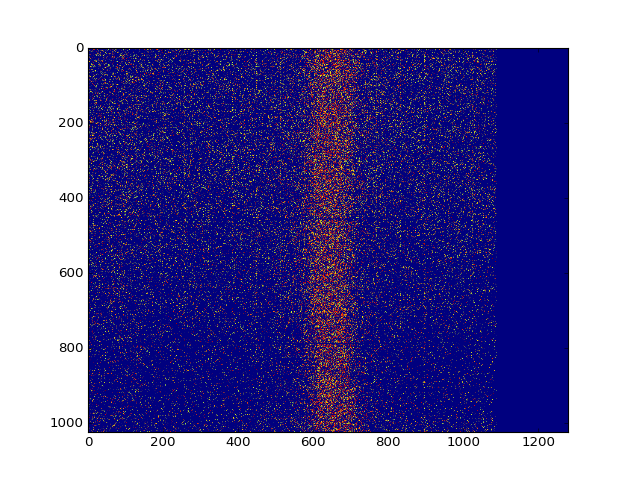

In [6]:
frames[4].show()

<IPython.core.display.Javascript object>


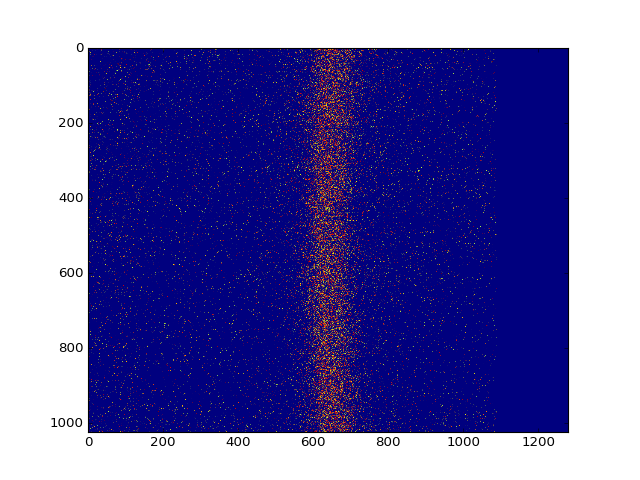

In [7]:
frames[2].show()

## Long exposure at 10 keV (best energy)

In [4]:
longframe=runset_and_merge('data/5.20.longrun0', 18, gain = '0x3f',
        numExposures = 2000, run = False, window_min = 31, window_max = 55,
        threshold_min = 31, threshold_max = 55)

In [9]:
longframe.plot_lineout(error_bars=False,rebin=1)
plt.show()

### Count rate (per sec)

In [40]:
sum(longframe.lineout())/45/2000/18*8

81.178306172839513

## Image of Long exposure

<IPython.core.display.Javascript object>


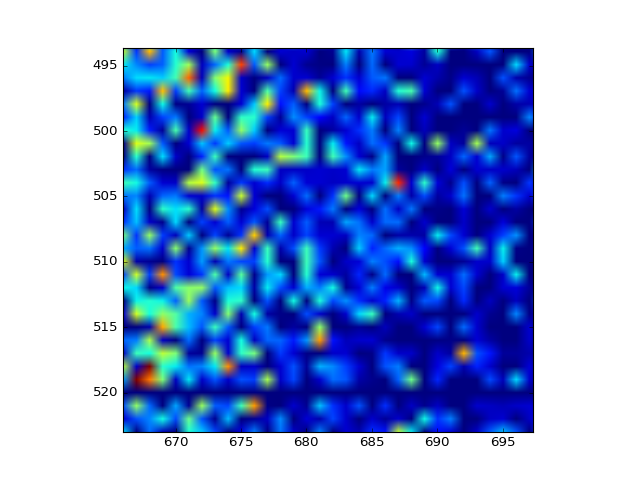

In [11]:
longframe.show(vmin=30,vmax=300)

## Comparison of 5.20.data0 and 5.20.energystudy 0
both runs should have had the same experimental conditions (camera unmoved, numExposures=4000)

In [45]:
data0=runset_and_merge('data/5.20.data0', 1, gain = '0x3f',
        numExposures = 4000, run = False, window_min = 31, window_max = 55,
        threshold_min = 31, threshold_max = 55)

In [46]:
energystudy0=runset_and_merge('data/5.20.energystudy0', 1, gain = '0x3f',
        numExposures = 4000, run = False, window_min = 31, window_max = 55,
        threshold_min = 31, threshold_max = 55)

In [47]:
data0.plot_lineout(error_bars=False)
energystudy0.plot_lineout(error_bars=False)
plt.show()